<a href="https://colab.research.google.com/github/Stephen-Njuguna/Moringa_school_IP_week-6/blob/main/Moringa_school_IP_Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MchezoPesa Ltd. Football Match Predictor**

### A) Defining the Question 

1.   A prediction result of a game between team 1 and team 2, based on who is home and who is away 
2.    Whether or not the game is friendly 



### B) Defining metrics of success 


1.   Been able to create a model that can predict the outcome of a match based on who is away and who is home
2.   Figuring out from the home team’s perspective if the game is a Win, Lose or Draw

### C) Understanding the Concept 

The mens team of nations member to FIFA nnational body are ranked based on the results of their matches. The highest ranked team being the most succesful team.Teams playing a match whille at home usually has a home advantage and this gives it a high probabilty of wining the match compared to when it playing a match while away. 


### D) Recording the Experimental Design


1.   Importing the libraries
2.   Loading and viewing the dataset
3.   Cleaning the data
4.   Drop unnecessary columns.
5.   Univariate analysis
6.   Bivariate analysis
7.   Multivariate analysis
8. challenging the solution 



## Reading Dataset

In [ ]:
#Import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Loading the Dataset 
ranking = pd.read_csv('fifa_ranking.csv')
results = pd.read_csv('results.csv')

## Checking Data 

In [ ]:
# Determining the no. of records in our dataset
#
print(ranking.shape)
print('*'*40)
print(results.shape)

(57793, 16)
****************************************
(40839, 9)


In [ ]:
# Previewing the Dataset
results.head(1)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False


In [ ]:
# Previewing the dataset
ranking.head(1)

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.0,57,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08


In [ ]:
#Drop some uncesseary columns of ranking dataset
ranking = ranking.drop(columns=['country_abrv', 'total_points', 'previous_points', 'rank_change',
                                       'cur_year_avg','cur_year_avg_weighted', 'last_year_avg',	'last_year_avg_weighted',
                                       'two_year_ago_avg',	'two_year_ago_weighted',	'three_year_ago_avg',	'three_year_ago_weighted',
                                       'confederation'])

In [ ]:
# Checking whether each column has an appropriate datatype
#
print(results.info())
print('*'*40)
print(ranking.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB
None
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   rank          57793 non-null  int64 
 1   country_full  57793 non-null  object
 2   rank_date     57793 non-null  object
dtypes: int64(1), object(2)
m

## Cleaning and Merging Dataset

In [ ]:
#Convert Date columns to Datetime type
results['date'] = pd.to_datetime(results['date'])
ranking['rank_date'] = pd.to_datetime(ranking['rank_date'])

In [ ]:
#Create new columns called year on both datasets 
results['year'] = results['date'].dt.year
ranking['year'] = ranking['rank_date'].dt.year

In [ ]:
ranking['year']

  

0        1993
1        1993
2        1993
3        1993
4        1993
         ... 
57788    2018
57789    2018
57790    2018
57791    2018
57792    2018
Name: year, Length: 57793, dtype: int64

In [ ]:
#Ranking started in 1993 so l will locate all the match results from 1993 to date
results = results.loc[(results['year'] >= 1993)]


In [ ]:
#Merge the datasets to get ranking home team  column
result = results.merge(ranking, left_on=['home_team', 'year'], right_on=['country_full', 'year'], how='inner')

In [ ]:
#Merge the new dataset with ranking again to get home team ranking column 
df = result.merge(ranking, left_on=['away_team', 'year'], right_on=['country_full', 'year'], how='inner')

In [ ]:
#Previewing the new Dataset 
df.head(1)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,rank_x,country_full_x,rank_date_x,rank_y,country_full_y,rank_date_y
0,1993-01-01,Ghana,Mali,1,1,Friendly,Libreville,Gabon,True,1993,48,Ghana,1993-08-08,74,Mali,1993-08-08


In [ ]:
#Renaming the columns to rank home team an rank away team respectively 
df.rename({'rank_x':'rank_home_team', 'rank_y':'rank_away_team'},axis=1, inplace=True)

In [ ]:
#Droping repetitive columns of the new dataset 
df =df.drop(columns=['city', 'country', 'neutral', 'year', 'country_full_x', 'country_full_y','rank_date_x','rank_date_y'])

In [ ]:
#Checking for duplicates on the new Dataset 
df.duplicated().sum()

1285070

In [ ]:
#Droping the duplicated rows in the dataset 
df.drop_duplicates(subset=['date','home_team','away_team','home_score','away_score','tournament'], keep= 'first', inplace= True)

In [ ]:
#Checking a the shape of the dataset after droping the duplicated rows
df.shape

(18384, 8)

In [ ]:
#Prevewing the final merged Dataset 
df.head(1)

,date,home_team,away_team,home_score,away_score,tournament,rank_home_team,rank_away_team
0,1993-01-01,Ghana,Mali,1,1,Friendly,48,74


In [ ]:
df['home_score'].unique()

array([ 1,  0,  2,  3,  4,  6,  5,  8,  9,  7, 10, 13, 12, 16, 14, 19, 11,
       20, 17, 31, 22, 15])

## Tidying the Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

<function matplotlib.pyplot.show>

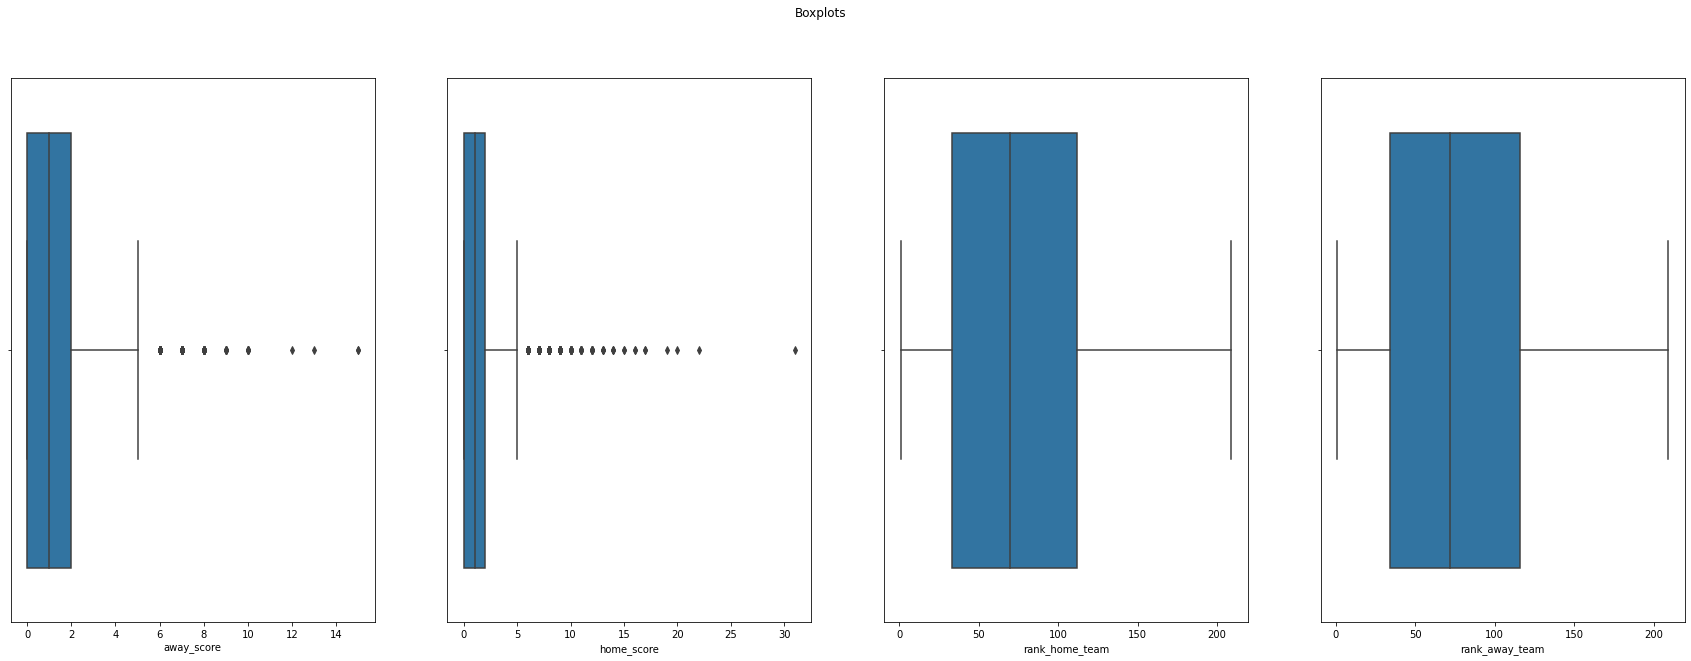

In [ ]:
# Checking for Outliers
#
fig, axes = plt.subplots(1, 4, figsize= [30,10])
fig.suptitle('Boxplots')
sns.boxplot(df['away_score'],ax=axes[0])
sns.boxplot(df['home_score'], ax=axes[1])
sns.boxplot(df['rank_home_team'],ax=axes[2])
sns.boxplot(df['rank_away_team'],ax=axes[3])

plt.show

### Outliers on the home and away score are as result of some team scoring very many goals in a single match which is totally normal 

In [ ]:
#Checking for anormalies 
for i in df.columns:
  print(df[i].unique())
  print('\n')

['1993-01-01T00:00:00.000000000' '1993-07-04T00:00:00.000000000'
 '1993-01-03T00:00:00.000000000' ... '2018-07-11T00:00:00.000000000'
 '2018-09-02T00:00:00.000000000' '2018-07-22T00:00:00.000000000']


['Ghana' 'Gabon' 'Burkina Faso' 'Sierra Leone' 'Senegal' 'Egypt' 'Morocco'
 'Gambia' 'Cameroon' 'Congo' 'Singapore' 'Qatar' 'Vietnam' 'Burundi'
 'Guinea-Bissau' 'Zimbabwe' 'Kenya' 'Kuwait' 'Angola' 'Tunisia' 'Mali'
 'Benin' 'Algeria' 'Germany' 'Liberia' 'Niger' 'Italy' 'Portugal'
 'Scotland' 'Estonia' 'India' 'Hong Kong' 'Bahrain' 'Mexico' 'Thailand'
 'Jordan' 'Pakistan' 'Yemen' 'Iraq' 'Oman' 'Malaysia' 'Macau'
 'Saudi Arabia' 'Uganda' 'South Africa' 'Ethiopia' 'Guinea' 'Togo'
 'Zambia' 'Botswana' 'Mauritius' 'Nigeria' 'Lesotho' 'Mozambique'
 'Belgium' 'Malawi' 'Tanzania' 'United Arab Emirates' 'Austria' 'France'
 'Malta' 'Sweden' 'England' 'Argentina' 'Brazil' 'Luxembourg' 'Namibia'
 'Israel' 'Poland' 'Bulgaria' 'Lebanon' 'Ecuador' 'Peru' 'Spain'
 'Costa Rica' 'El Salvador' 'Honduras' '

In [ ]:
#Checking for missing values 
df.isnull().sum()

date              0
home_team         0
away_team         0
home_score        0
away_score        0
tournament        0
rank_home_team    0
rank_away_team    0
dtype: int64

## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
#Plot a histogram 
df.describe()

,home_score,away_score,rank_home_team,rank_away_team
count,18384.000000,18384.000000,18384.000000,18384.000000
mean,1.608029,1.066144,76.120920,78.837685
std,1.624110,1.248174,51.383625,52.602884
min,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,33.000000,34.000000
50%,1.000000,1.000000,70.000000,72.000000
75%,2.000000,2.000000,112.000000,116.000000
max,31.000000,15.000000,209.000000,209.000000


### Biavariate Analysis

In [ ]:
#Ecoding the Tournament column so that we can plot a heat map 
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df['tournament'] = en.fit_transform(df['tournament'])
df['tournament'].unique()

array([27,  9,  7, 26, 38, 33, 61, 41, 16, 18, 35, 10, 59, 28, 34, 13, 12,
       62,  6, 51, 25, 57, 30, 11, 37, 46, 15, 23, 45, 49, 65, 52,  2,  1,
       32, 56,  5, 36, 14, 22, 53, 20, 54, 29, 60, 64, 43, 39, 48, 50, 24,
        3, 55, 19,  4, 63,  8, 21, 42, 47, 40,  0, 44, 17, 58, 31])

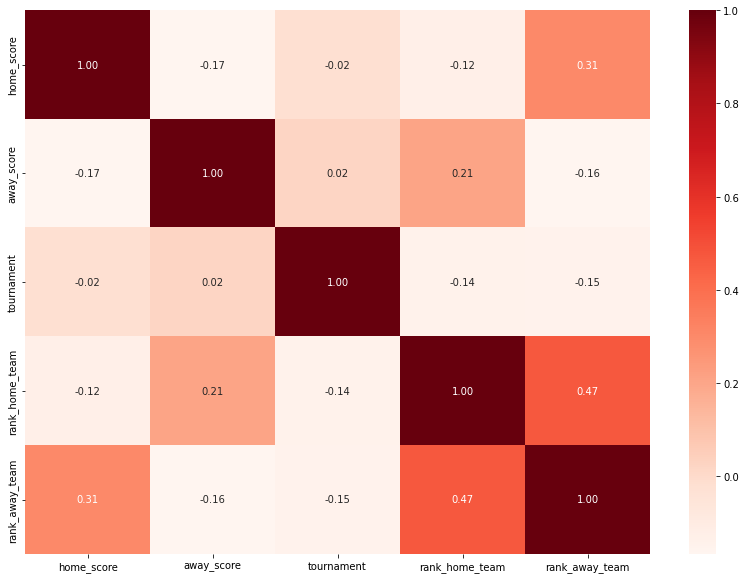

In [ ]:
#Plotting a heat map to show correlation between the different variables
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()



1.   There is a weak postive correlation between home_score and rank_away_team
2.   There is weak negative correlation between home score and rank_home_team



### Multivariate Analysis

### Polynomial Linear Regression Model 

#### Model 1
 Predict how many goals the home team scores

In [ ]:
#Spliting Dataset to Target and feature set 
X =df[['away_score','tournament','rank_home_team','rank_away_team']].values
y = df['home_score'].values

In [ ]:
#checking for multicollinearity for independent variables only 
independent_value =df[['away_score','tournament','rank_home_team','rank_away_team']]
correlations =independent_value.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)



,away_score,tournament,rank_home_team,rank_away_team
away_score,1.155408,-0.032024,-0.433169,0.388565
tournament,-0.032024,1.029883,0.109214,0.093148
rank_home_team,-0.433169,0.109214,1.462306,-0.748432
rank_away_team,0.388565,0.093148,-0.748432,1.431895


#### VIF score of all the independent variable are not close to 5, that means there are not dependent 

In [ ]:
## split variables to train and test 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)


In [ ]:
#Lets transform the data into a polynomial 
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X)

In [ ]:
#Fiting parameters using LinearRegression 
model = LinearRegression()

Lin = model.fit(X_poly, y)

y_pred= model.predict(poly_reg.fit_transform(X_test))

In [ ]:
#Calculate Root mean square Error
from sklearn import metrics
print("Root mean square error :",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

Root mean square error : 1.4082679240046219


#### Residual and heteroskedasticity testing



In [ ]:
#Residual 
model = LinearRegression()
model.fit(X_train, y_train)

# This is our prediction for admission based on our model
predicts = model.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(predicts, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()
residuals.mean()

0.02934723335778893

In [ ]:
# Heteroskedasticity
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

2.6439661822393908e-307
the variances are homogeneous!


Model 1 has proven that its sufficient for predicting the home team score  and checking the residuals, whose variances are homogenous, we can be comfortable with our results.

#### Model 2

In [ ]:
#Spliting Dataset to Target and feature set 
X =df[['home_score','tournament','rank_home_team','rank_away_team']].values
y = df['away_score'].values

In [ ]:
## split variables to train and test 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)

#Lets transform the data into a polynomial 
poly_reg = PolynomialFeatures(degree = 4) 
X_poly = poly_reg.fit_transform(X)

In [ ]:
#Fiting parameters using LinearRegression 
model = LinearRegression()

Lin = model.fit(X_poly, y)

y_pred= model.predict(poly_reg.fit_transform(X_test))

In [ ]:
#Calculate Root mean square Error
from sklearn import metrics
print("Root mean square error :",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

Root mean square error : 1.140627919456937


In [ ]:
#Residual 
model = LinearRegression()
model.fit(X_train, y_train)

# This is our prediction for admission based on our model
predicts = model.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(predicts, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()
residuals.mean()

-0.022421233264984426

In [ ]:
# Heteroskedasticity
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

0.0
the variances are homogeneous!


Model 2 has proven that its sufficient for predicting the away team score  and checking the residuals, whose variances are homogenous, we can be comfortable with our results.



## Logistics Regression 

#### Question 


1.    Figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)




In [ ]:
def match_outcome(row):
  if row['home_score'] > row['away_score']:
    outcome = 'Win'
  elif row['home_score'] < row['away_score']:
    outcome = 'Lose'
  else:
    outcome = 'Draw'
  return outcome

df['Game_result'] = df.apply(match_outcome, axis=1)
df.head(1)

,date,home_team,away_team,home_score,away_score,tournament,rank_home_team,rank_away_team,Game_result
0,1993-01-01,Ghana,Mali,1,1,27,48,74,Draw


In [ ]:
#Encoding game_results to numeric 
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
df['Game_result'] = en.fit_transform(df['Game_result'])

In [ ]:
df.head(1)

,date,home_team,away_team,home_score,away_score,tournament,rank_home_team,rank_away_team,Game_result
0,1993-01-01,Ghana,Mali,1,1,27,48,74,0


In [ ]:
# Splitting our dataset
X = df[['away_score','tournament','rank_home_team','rank_away_team','home_score']].values
y = df['Game_result'].values

In [ ]:
#split train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

In [ ]:
# Fitting model logostic Regression 
# 
from sklearn.linear_model import LogisticRegression

model_l = LogisticRegression()
log = model_l.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Making Prdiction  using our model 
y_pred = log.predict(X_test)


In [ ]:
#Evaluating Model using confusion matrics
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1323,    0,    0],
       [   0, 1529,    0],
       [   0,    0, 2664]])

In [ ]:
#Checking for model accurcy 
from sklearn.metrics import accuracy_score
score = accuracy_score
print("Model Accuracy :",log.score(X_test,y_test)*100)

Model Accuracy : 100.0


In [ ]:
#Hyperparameter tuning 
#challenging my model 

c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}
  
# Instantiating logistic regression classifier
logreg = LogisticRegression()
  
# Instantiating the GridSearchCV object
logreg_cv = GridSearchCV(logreg, param_grid, cv = 5)
  
logreg_cv.fit(X_test, y_test)
 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 1.0


### Conclusion 

Using Both polynomial and Logistics Regression to train and test our model proved to be both accurate while making predictions.
when using Logistics Regression to train make prediction if home team is going to win , lose or draw, our model was 100% accurrate 